_D. Sierra Porta_

# Aplicaciones de Autovalores y Autovectores en Ciencia de Datos: Motivación y Ejemplo con el Dataset Iris

## Motivación
Las aplicaciones de autovalores y autovectores en ciencia de datos son fundamentales para extraer información esencial de conjuntos de datos complejos. Utilizando estos conceptos, es posible identificar las direcciones principales de variación en los datos, lo que se traduce en la reducción de dimensionalidad y en la mejora de la interpretabilidad de los modelos. Por ejemplo, el primer componente principal—también conocido como el autovector asociado al mayor autovalor—representa la dirección en la que los datos varían más, mientras que los siguientes componentes capturan variaciones secundarias. 

Para ilustrar estos conceptos, consideremos un conjunto de datos bidimensional. Al calcular la matriz de covarianza de los datos, se puede obtener la descomposición en valores y vectores propios. Utilizando numpy en Python, se realiza el siguiente proceso:

> import numpy as np
> 
> C = np.cov(X, rowvar=False)
>
> eigenvalues, eigenvectors = np.linalg.eig(C)

Aquí, cada autovector indica una dirección principal (componente principal) en el espacio de datos, y su autovalor asociado cuantifica la varianza a lo largo de esa dirección. En otras palabras, al multiplicar la matriz de covarianza por nuestros datos, éstos se "estiran" en la dirección del autovector con mayor autovalor y se "comprimen" en la dirección del autovector con menor autovalor. Este comportamiento permite no sólo visualizar la estructura interna de los datos, sino también reducir su dimensionalidad, manteniendo la mayor parte de la información relevante.

El Análisis de Componentes Principales (PCA) aprovecha estos principios para transformar un conjunto de datos con muchas características en un conjunto de variables de menor dimensión que conserva la mayor varianza. Esto resulta especialmente útil en contextos en los que el número de variables es muy alto y se requiere simplificar el análisis sin perder información crucial.

## Ejemplo Práctico: El Dataset Iris (https://archive.ics.uci.edu/dataset/53/iris)
El dataset Iris es un clásico de la ciencia de datos. Consta de 150 muestras de tres especies de iris (\emph{Iris setosa}, \emph{Iris versicolor} e \emph{Iris virginica}), cada una con cuatro características: longitud y ancho del sépalo, y longitud y ancho del pétalo. 

### Información adicional
Se trata de uno de los primeros conjuntos de datos utilizados en la literatura sobre métodos de clasificación y ampliamente utilizado en estadística y aprendizaje automático.  El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris.  Una de las clases es linealmente separable de las otras dos, mientras que éstas no son linealmente separables entre sí.

Unwin, A., & Kleinman, K. (2021). The iris data set: In search of the source of virginica. Significance, 18. (https://api.semanticscholar.org/CorpusID:244763032)

La aplicación de PCA al dataset Iris sigue los siguientes pasos:

- **Estandarización de los Datos:** Se centra el dataset restando la media y se escala dividiendo por la desviación estándar de cada característica.
- **Cálculo de la Matriz de Covarianza:** A partir del dataset estandarizado, se calcula la matriz de covarianza \(C\) para evaluar la varianza compartida entre las características.
- **Descomposición en Valores Propios:** Se extraen los autovalores y autovectores de la matriz \(C\), utilizando técnicas numéricas (por ejemplo, \texttt{np.linalg.eig} de Python).
- **Selección de Componentes Principales:** Se ordenan los autovectores según el valor de sus autovalores y se seleccionan aquellos que capturan la mayor parte de la varianza (generalmente los dos primeros en el caso de Iris).
- **Proyección:** Los datos originales se proyectan en el espacio definido por los autovectores seleccionados, permitiendo visualizar la estructura y el agrupamiento de las tres especies de iris en dos dimensiones.

Esta reducción de dimensionalidad no solo facilita la visualización y el análisis, sino que también mejora la eficiencia de modelos predictivos al eliminar características redundantes o ruidosas.

## Resumen
La aplicación de autovalores y autovectores en PCA es un pilar en el análisis de datos de alta dimensionalidad. Al identificar las direcciones de mayor varianza en un conjunto de datos, estos conceptos permiten transformar, visualizar y reducir la complejidad de la información, sin perder la esencia de la variabilidad intrínseca. Utilizando el dataset Iris, se ilustra cómo PCA extrae los componentes principales que representan las “direcciones” más importantes, facilitando tanto la interpretación como el modelado en ciencia de datos. Este proceso es fundamental en diversas aplicaciones, desde el procesamiento de imágenes hasta la minería de datos, demostrando la importancia de estos conceptos en el campo.

Con esta motivación y ejemplo, este notebook busca ofrecer una introducción práctica y visual al uso de PCA, demostrando la relevancia de los autovalores y autovectores en la simplificación y análisis de datos complejos.

![IRIS](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Cargemos datos...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

import pandas as pd

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()

iris_df = pd.DataFrame(data = iris['data'],columns = iris['feature_names'])
iris_df_tar=iris_df.copy()
iris_df_tar['target']=iris['target']
iris_df_tar

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

import pandas as pd

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()

iris_df = pd.DataFrame(data = iris['data'],columns = iris['feature_names'])
iris_df_tar=iris_df.copy()
iris_df_tar['target']=iris['target']
iris_df_tar

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Echemos un vistazo rápido al conjunto de datos.

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1200x600 with 0 Axes>

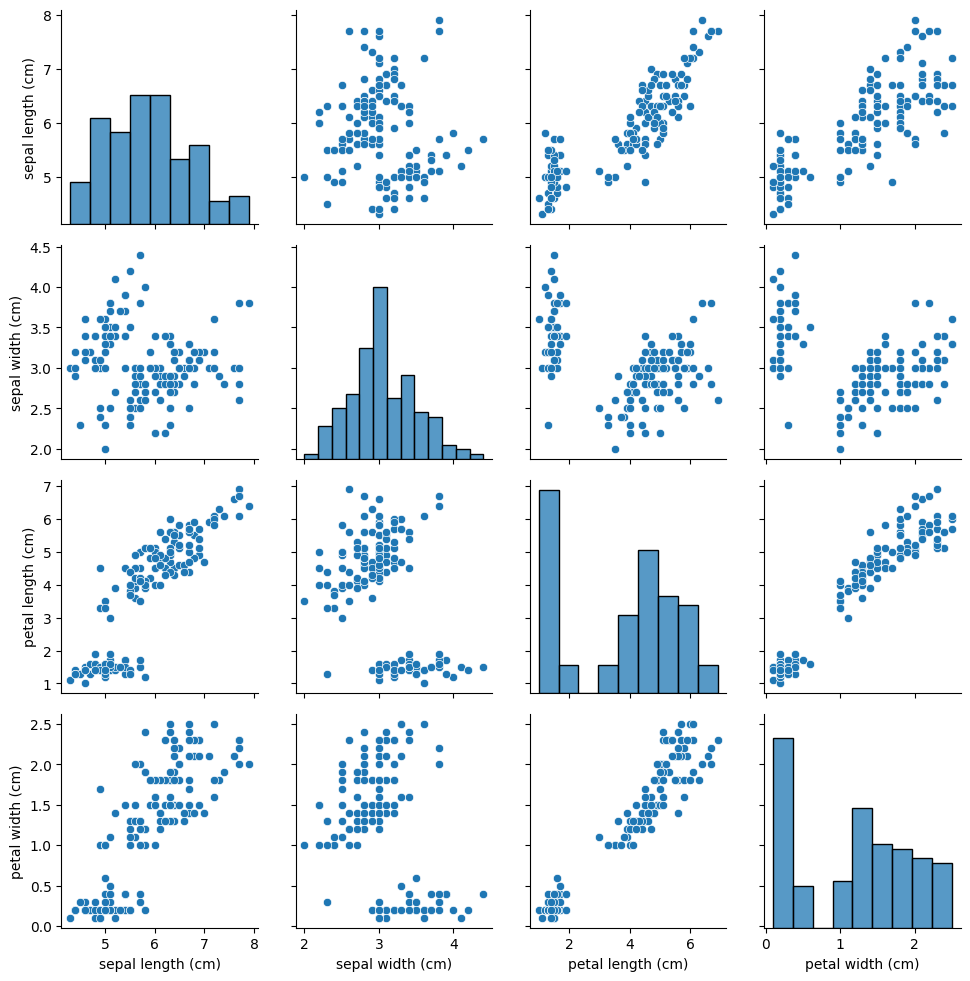

In [4]:
import seaborn as sns
plt.figure(figsize=(12,6))
g = sns.PairGrid(iris_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

## De todas las variables cuáles son las más importante??

Podemos crear lo que se denomina «scree plot» para ver qué variables explican la mayor variabilidad de los datos. Para ello, realizamos un primer ACP.

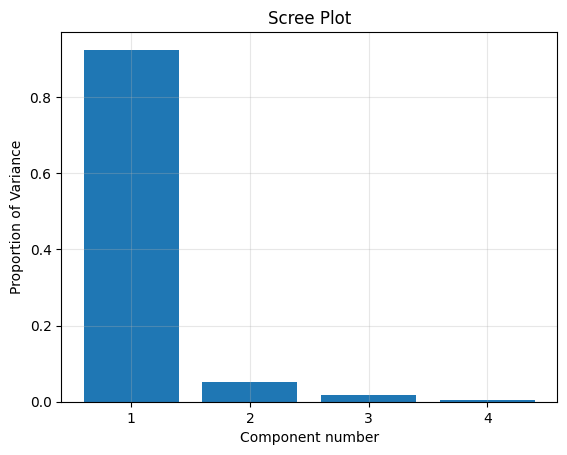

In [5]:
from sklearn.decomposition import PCA
#svd_solver : {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}
pca = PCA(random_state=1623,svd_solver='randomized')
pca = pca.fit(iris_df)
plt.bar(np.arange(1,5), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, 5))  # Set label locations.
plt.xlabel("Component number")
plt.ylabel("Proportion of Variance")
plt.title("Scree Plot")
plt.grid(alpha=0.3)
plt.show()

## Covarianza, matriz de covarianza...

In [6]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## Autovectores y autovalores:

Podemoslos usar las herramientas de numpy en python para trabajar con matrices grandes y usar este poder para transformarlas y calcular cosas sobre ellas. En particular, dada la matriz de covarianza anterior podemos calcular los autovalore sy los autovectores correspondientes, siguiendo:

$$A\cdot v=\lambda \cdot v$$

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(pca.get_covariance())

In [8]:
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [9]:
eigenvectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

La matriz de convarianza podemoslos calcularla directamente usando las herramientas de python específicos{ificamente numpy...

In [10]:
C = np.cov(iris_df, rowvar = False)

In [11]:
C

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Pero tambien podemos calcular los Valores propios y Vectores propios con estas mismas herramientas..

Ahora calcularemos los vectores propios y los valores propios de nuestro espacio de características, que son muy útiles para identificar los componentes principales de nuestro espacio de características.

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [4.22824171 0.24267075 0.0782095  0.02383509]
Eigen values Shape: (4,)
Eigen Vector Shape: (4, 4)


In [13]:
eigenvectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

Para obtener las componentes principales, se debe proyectar los datos originales en el espacio generado por los autovectores de la matriz de covarianza. Aunque la matriz de covarianza es de dimensión 4x4 (porque originalmente tienes 4 variables), el dataset original tiene 150 observaciones, por lo que la matriz de datos X tiene dimensión 150x4.

El proceso es el siguiente:
- Calcular los autovectores y autovalores de la matriz de covarianza, obteniendo una matriz \(V\) de dimensión 4x4, donde cada columna es un autovector.
- Proyectar los datos originales (después de centrar o estandarizar) sobre el espacio de los autovectores. Esto se realiza multiplicando la matriz de datos \(X\) (de dimensión 150x4) por la matriz \(V\) (de dimensión \(4 \times 4\)):

  $ X_{\text{proj}} = X \, V. $

El resultado $ X_{\text{proj}} $ tendrá dimensión 150x4, en donde cada columna representa una componente principal. Así, la primera columna (asociada al mayor autovalor) es la primera componente principal, que es un vector de dimensión 150x1, donde cada entrada corresponde a la proyección de cada observación en esa dirección.

In [14]:
pd.DataFrame(np.dot(np.array(iris_df),C)) # Pero hay primero que normalizar y estandarizár....

,0,1,2,3
0,5.235814,-0.037332,9.967122,4.137297
1,5.119892,-0.123835,9.877087,4.094863
2,4.846835,-0.044387,9.244665,3.837720
3,5.037372,-0.125073,9.773455,4.057378
4,5.163001,-0.014091,9.806725,4.073506
...,...,...,...,...
145,12.280707,-1.708353,26.733491,11.167579
146,11.566276,-1.671782,25.247093,10.530366
147,11.988687,-1.663375,26.089945,10.890023
148,12.175750,-1.677076,26.587726,11.119910


Como vemos, los dos primeros componentes explican la mayor parte de la variabilidad de los datos. Por lo tanto, he decidido conservar sólo los dos primeros componentes y descartar el resto. Una vez determinado el número de componentes que debemos conservar, podemos realizar un segundo ACP en el que reduciremos el número de características.

## Vamos a la implementacion...

In [15]:
## En este caso asumiremos una reduccion a dos caracteristicas sólamente...
pca = PCA(n_components = 2)
pca = pca.fit(iris_df)
iris_transformed = pca.transform(iris_df)

In [16]:
pca = PCA(n_components = 2)
pca = pca.fit(iris_df)
iris_transformed = pca.transform(iris_df)

In [17]:
print(iris_transformed[:5,:])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [18]:
pd.DataFrame(iris_transformed)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


Podemos ver que sólo nos quedan dos columnas. Estas columnas/variables son una combinación lineal de nuestros datos originales y no corresponden a una característica del conjunto de datos original (como la anchura del sépalo, la longitud del sépalo, etc.).

Visualicemos nuestros datos.

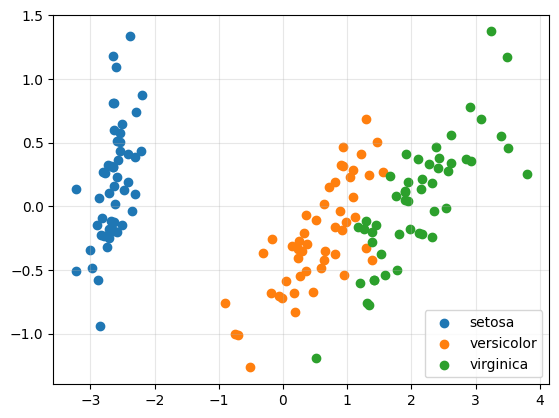

In [19]:
for i, species in enumerate(iris['target_names']):
    plt.scatter(iris_transformed[:,0][iris['target'] == i], iris_transformed[:,1][iris['target'] == i])
plt.legend(iris['target_names']); plt.grid(alpha=0.3)
plt.show()

Podemos ver que se ha conservado gran parte de la información de los datos y ahora podemos entrenar un modelo ML que clasifique los puntos de datos según las tres especies.

## Algunas fuentes adicionales:

- https://datascienceplus.com/understanding-the-covariance-matrix/
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html